# House Price Prediction using Machine Learning in Python

Importing Libraries and Dataset
Here we are using 

1. Pandas – To load the Dataframe
2. Matplotlib – To visualize the data features i.e. barplot
3. Seaborn – To see the correlation between features using heatmap

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install --upgrade matplotlib seaborn
import sklearn; print(sklearn.__version__)

 
dataset = pd.read_excel("HousePricePrediction.xlsx")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

1.5.0
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [54]:
dataset.shape

(2919, 13)

# Data Preprocessing
Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [55]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# Exploratory Data Analysis
EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

So here let’s make a heatmap using seaborn library.

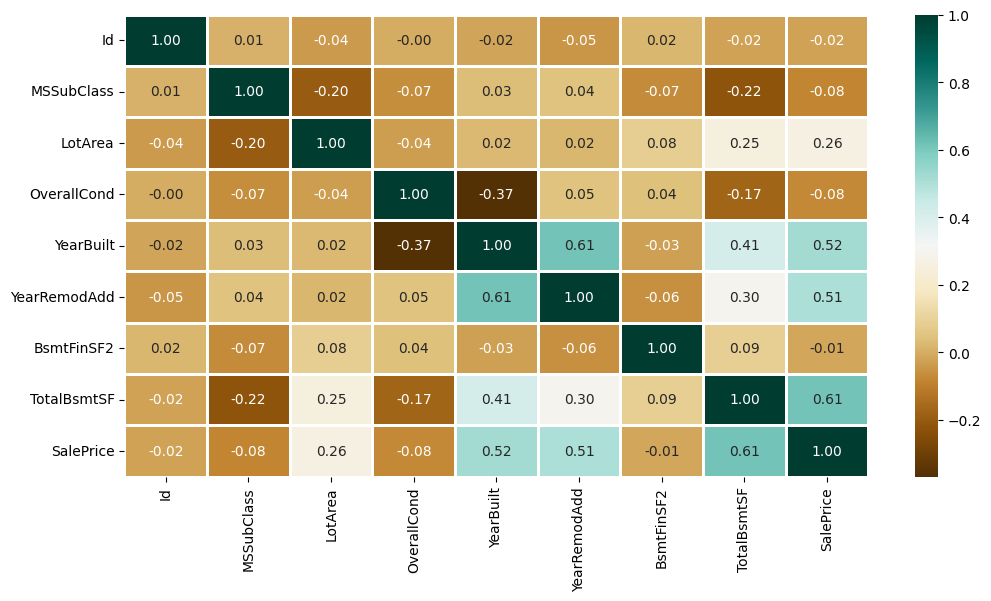

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(numeric_only=True),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

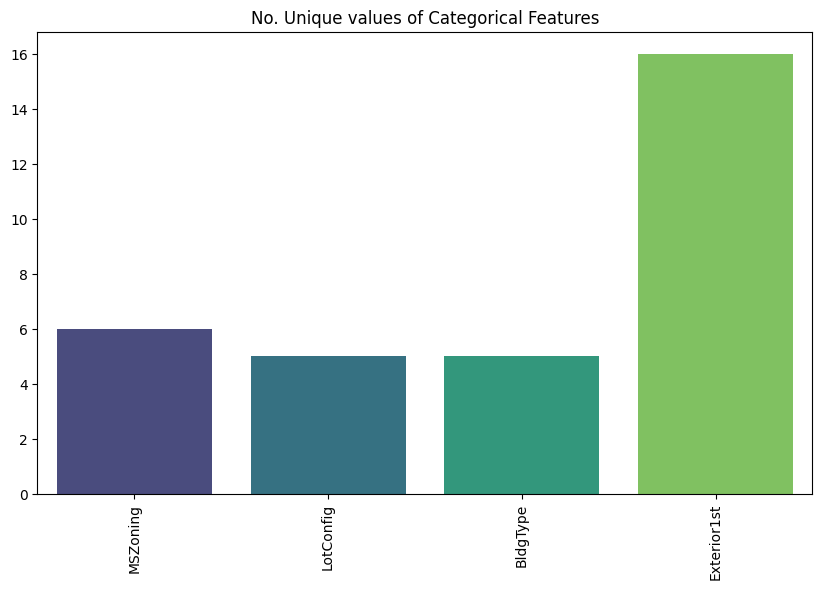

In [57]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values,hue=object_cols,palette="viridis")

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

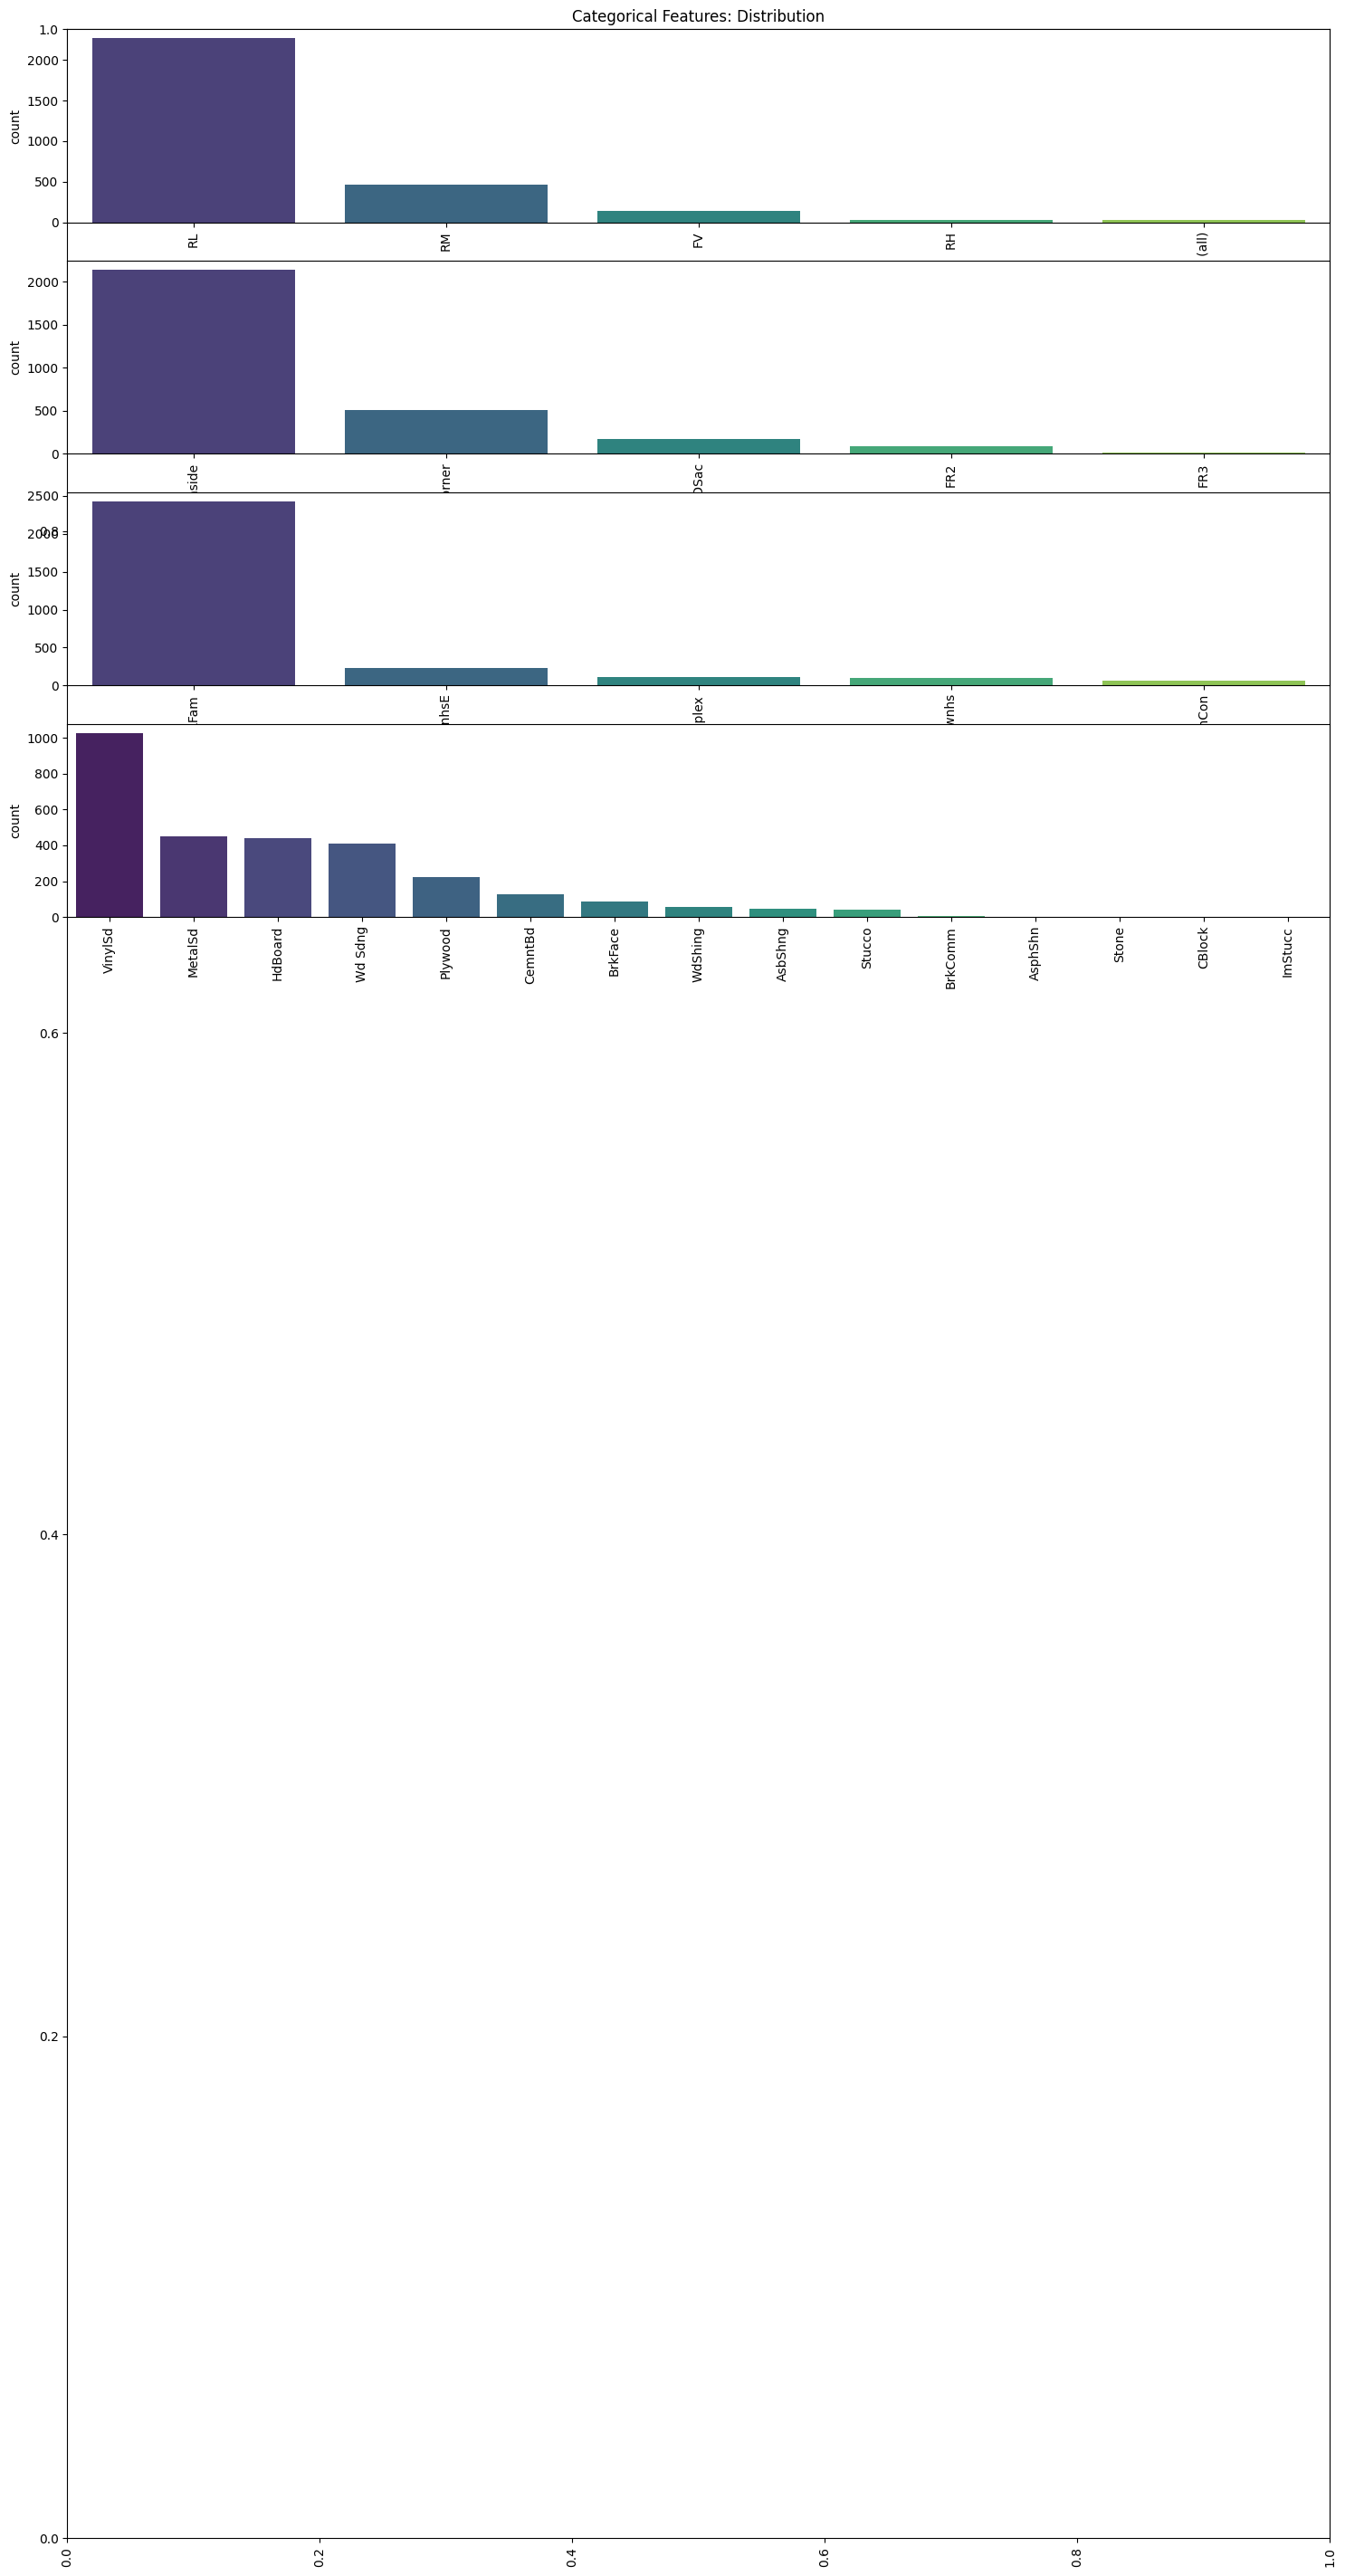

In [58]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 1, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, hue =list(y.index) ,palette="viridis")
    index += 1

# Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

1. We can easily delete the column/row (if the feature or record is not much important).
2. Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

   
As Id Column will not be participating in any prediction. So we can Drop it.

In [59]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [60]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [61]:
new_dataset = dataset.dropna()


Checking features which have null values in the new dataframe (if there are still any).

In [62]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.



In [63]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [64]:
OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

1. SVM-Support Vector Machine
2. Random Forest Regressor
3. Linear Regressor

And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error : 

## SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane. 

In [66]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


## Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [67]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19320548993318667

## Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [68]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841600051


## CatBoost Classifier
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library. 

In [82]:
# !pip install catboost
import catboost
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 
 
print(mean_absolute_percentage_error(Y_valid, preds))
# cb_r2_score=r2_score(Y_valid, preds)
# cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 1.66ms	remaining: 1.65s
1:	learn: 55780.1567575	total: 3.12ms	remaining: 1.55s
2:	learn: 55060.9599505	total: 4.45ms	remaining: 1.48s
3:	learn: 54456.1126921	total: 5.83ms	remaining: 1.45s
4:	learn: 53901.1464265	total: 7.17ms	remaining: 1.43s
5:	learn: 53334.6062357	total: 8.37ms	remaining: 1.39s
6:	learn: 52824.4943646	total: 9.52ms	remaining: 1.35s
7:	learn: 52381.4267520	total: 10.6ms	remaining: 1.32s
8:	learn: 51841.0364316	total: 11.7ms	remaining: 1.29s
9:	learn: 51281.5852560	total: 12.8ms	remaining: 1.26s
10:	learn: 50825.3817438	total: 13.9ms	remaining: 1.25s
11:	learn: 50477.2609796	total: 15.1ms	remaining: 1.25s
12:	learn: 50081.4097641	total: 16.3ms	remaining: 1.24s
13:	learn: 49663.6380360	total: 17.4ms	remaining: 1.23s
14:	learn: 49334.5782662	total: 18.5ms	remaining: 1.21s
15:	learn: 48967.5221026	total: 19.6ms	remaining: 1.2s
16:	learn: 48676.4063222	total: 20.7ms	remaining: 1.2s
17:	learn: 48359.1169955	total